<a href="https://colab.research.google.com/github/ilyas122/CMPE_255-Data-Mining/blob/main/assignment_1_Fnu_MohammedIlyasAhmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.Statistical Descriptions of Data and identification of outliers 

In [ ]:
# a. Classify each variable’s type 
import pandas as pd

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel('housing.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


The sale price of a house is a quantitative variable because it is a numerical measurement on a continuous scale.

The variable "lot" represents the size of the lot, and it is considered a quantitative variable because it can have any numerical value within a specific range.

"Bdms" represents the number of bedrooms in a house, and it is a discrete variable because it can only take whole number values.

Similarly, "fb" represents the number of full bathrooms in the house, and "sty" represents the style of the house, both of which are discrete variables as they can only take a limited number of categorical values.

"Drv," "rec," "ffin," "ghw," and "ca" are all binary categorical variables because they only have two possible values: "yes" or "no."

Lastly, "gar" represents the number of garage spaces in the house, and it is a discrete variable since it can only take on whole number values.

In [ ]:
# b. Run descriptive statistics for price and lotsize 
print(df[['price', 'lotsize']].describe())

               price       lotsize
count     546.000000    546.000000
mean    68121.597070   5150.265568
std     26702.670926   2168.158725
min     25000.000000   1650.000000
25%     49125.000000   3600.000000
50%     62000.000000   4600.000000
75%     82000.000000   6360.000000
max    190000.000000  16200.000000


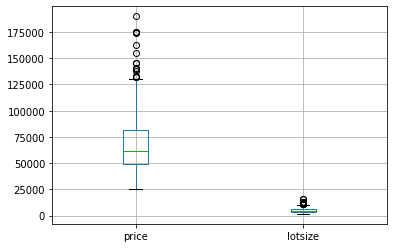

In [ ]:
#c. Visualize boxplot for price and lotsize
import matplotlib.pyplot as plt
df.boxplot(column=['price', 'lotsize'])
plt.show()




In [ ]:
#d. Identify outliers for price and lotsize 

Q1 = df[['price', 'lotsize']].quantile(0.25)
Q3 = df[['price', 'lotsize']].quantile(0.75)
IQR = Q3 - Q1

print((df[['price', 'lotsize']] < (Q1 - 1.5 * IQR)) | (df[['price', 'lotsize']] > (Q3 + 1.5 * IQR)))

     price  lotsize
0    False    False
1    False    False
2    False    False
3    False    False
4    False    False
..     ...      ...
541  False    False
542  False    False
543  False    False
544  False    False
545  False    False

[546 rows x 2 columns]


In [ ]:
# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers for price and lotsize columns
price_outliers = df[(df['price'] < lower_bound['price']) | (df['price'] > upper_bound['price'])]
lotsize_outliers = df[(df['lotsize'] < lower_bound['lotsize']) | (df['lotsize'] > upper_bound['lotsize'])]

# Print the outliers
print('Price outliers:')
print(price_outliers)
print('Lotsize outliers:')
print(lotsize_outliers)

Price outliers:
      price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
92   163000     7420         4        1        2      yes     yes      yes   
103  132000     3500         4        2        2      yes      no       no   
216  138300     6000         4        3        2      yes     yes      yes   
331  175000     8960         4        4        4      yes      no       no   
337  155000     7500         3        3        1      yes      no      yes   
338  141000     8100         4        1        2      yes     yes      yes   
361  145000     8580         4        3        4      yes      no       no   
362  175000     9960         3        2        2      yes      no      yes   
368  145000    16200         5        3        2      yes      no       no   
375  133000     6550         4        2        2      yes      no       no   
376  140000     5750         3        2        4      yes     yes       no   
377  190000     7420         4        2        3

In [ ]:
# 2.Statistical Descriptions of Data and handling missing Values

In [ ]:
# a. Classify each variable’s type
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



The variable "survival" is binary categorical as it represents whether a passenger survived or not. 

"Pclass" is ordinal categorical as it has a natural order of values, which are first class, second class, and third class. 

"Name," "ticket," "cabin," and "embarked" are nominal categorical variables because the values do not have a natural order or ranking. 

"Sex" is binary categorical as it can only take two possible values, male or female. "Age," "sibsp," and "parch" are discrete quantitative variables as they only take on whole number values. 

"Fare" is a continuous quantitative variable as it can take on any numerical value within a specific interval, such as from 0 to infinity.


In [ ]:
# b. Run descriptive statistics for Age and Fare 
print(df[['Age', 'Fare']].describe())

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [ ]:
#d.Fill in the missing values in Age and explain the method you used.

# Compute the mean of Age column
age_mean = df['Age'].mean()

# Fill in the missing values in Age column with the mean
df['Age'].fillna(age_mean, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are various methods for handling missing data, such as ignoring it, manually filling in values, using global constants, and inferring values from the available data. In this case, the chosen approach is to impute the missing values for the 'age' attribute by calculating its mean and replacing the missing values with this mean value. This is a common technique known as mean imputation, which is straightforward and can be effective in cases where there is a limited amount of missing data. However, mean imputation has some limitations, such as its potential to distort the distribution of the data and its underlying assumption that the missing data is random. Despite these limitations, mean imputation remains a popular and useful method for handling missing data in various contexts.

# New Section

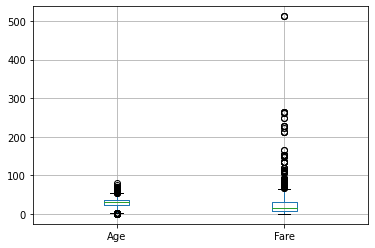

In [ ]:
# c. Visualize boxplot for Age and Fare 
df.boxplot(column=['Age', 'Fare'])
plt.show()